In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## complex functions
i = 1j
def Modulus(z):
    a = z.real
    b = z.imag
    return np.sqrt(a * a + b * b)

def Arg(z, mode = "radians"):
    a = z.real
    b = z.imag
    theta = np.arctan2(b, a)
    if mode == "radians" or mode=="rad":
        return theta
    elif mode == "degrees" or mode=="deg":
        return np.rad2deg(theta)
    else:
        raise ValueError(
            f"Acceptable mode is 'degrees' or 'radians', not {mode}"
        )

def conjugate(z):
    a = z.real
    b = z.imag
    return a - b*1j


z = 1 + i
w = 2 + i
print(f"    z  : {z}")
print(f"Mod(z) : {Modulus(z)}")
print(f"Arg(z) : {Arg(z,"degrees")}°")
print(f"z_bar  : {conjugate(z)}")
print(z**2, 2**z,np.log(z), z**w, z*w, z+w)

    z  : (1+1j)
Mod(z) : 1.4142135623730951
Arg(z) : 45.0°
z_bar  : (1-1j)
2j (1.5384778027279442+1.2779225526272695j) (0.34657359027997264+0.7853981633974483j) (-0.3097435049284936+0.857658012588736j) (1+3j) (3+2j)


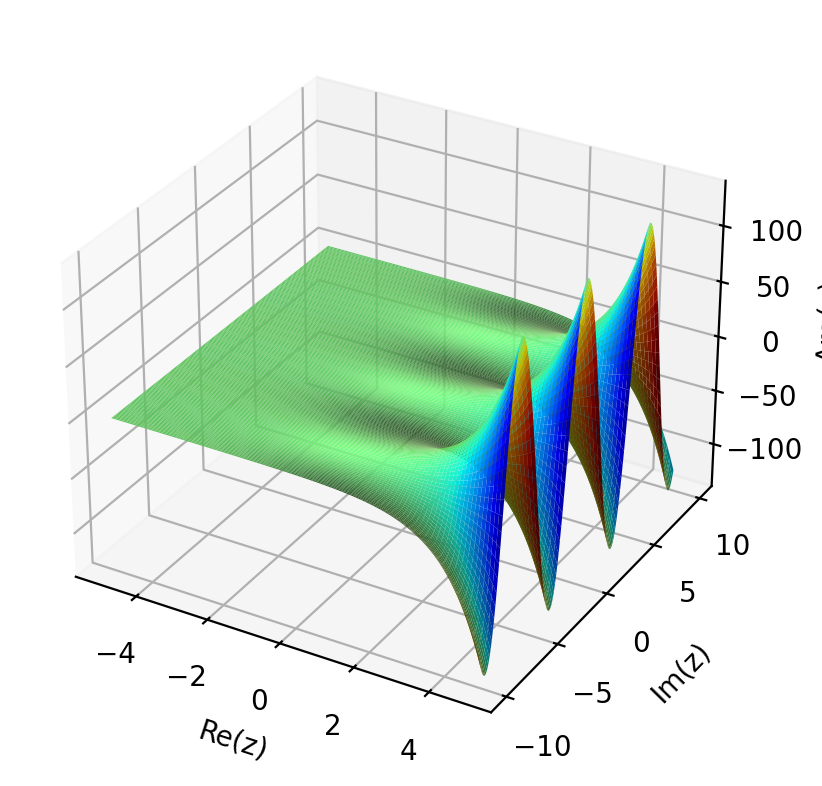

In [2]:

# Setup
delta = 0.1
lims = -5, 5
a = np.arange(*lims, delta)
b = np.arange(-10,10, delta)
A, B = np.meshgrid(a, b)
Z = A + B * 1j  # Complex grid

# Define a function of z
def func(z):
    return np.exp(z)

F = func(Z)

# Get components
X = Z.real
Y = Z.imag
Z_surface = F.real
color_values = F.imag  # Use magnitude of imaginary part

# Normalize color values to [0, 1]
norm = plt.Normalize(color_values.min(), color_values.max())
colors = plt.cm.jet(norm(color_values))  # You can change 'viridis' to any other cmap

# Plot
fig = plt.figure(dpi = 200)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_surface, facecolors=colors, edgecolor='none',linewidth = 0.1, cstride=1,rstride = 1)
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Arg(z)')

plt.show()



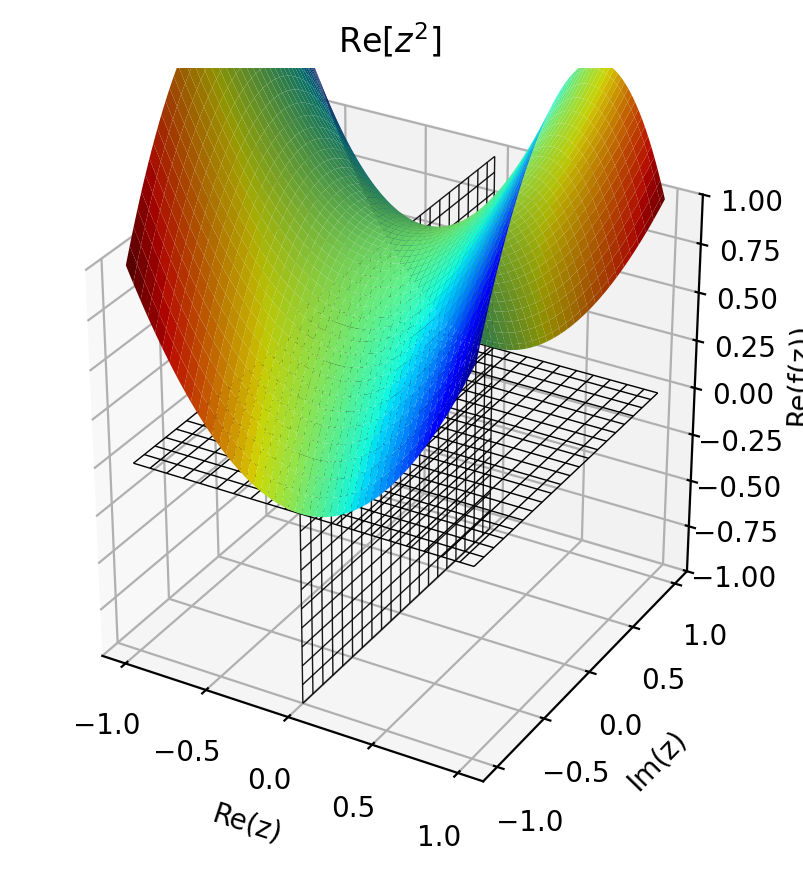

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
delta = 100
lims = -1, 1
a = np.linspace(*lims, delta)
b = np.linspace(*lims, delta)
A, B = np.meshgrid(a, b)
Z = A + B * 1j  # Complex grid

# Define a function of z
def func(z):
    return z**2 + 1

F = func(Z)

# Components
X = Z.real
Y = Z.imag
Z_surface = F.real
color_values = F.imag

# Clip Z values for clean z-limits (no triangle holes)
Z_surface_clipped = np.clip(Z_surface, lims[0], 3)

# Normalize colors
norm = plt.Normalize(np.min(color_values), np.max(color_values))
colors = plt.cm.jet(norm(color_values))

# Plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_surface_clipped,
                facecolors=colors,
                edgecolor='none',
                linewidth=0.1,
                cstride=2, rstride=2)
ax.plot_wireframe(X,Y,Z_surface*0, color = "k", cstride = 5, rstride = 5, linewidth =0.5)

X_plane = np.zeros_like(A)  # Same shape as X and Y
Y_plane = Y
Z_plane = X # Or Z_surface*0 if you want a flat plane at z=0
ax.plot_wireframe(X_plane, Y_plane, Z_plane, color='k', alpha=0.9, cstride=5, rstride=5, linewidth=0.5)


# Labels and limits
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Re(f(z))')
ax.set_zlim(*lims)
ax.set_box_aspect([1,1,1])
plt.title(f"Re[$z^2$]")
plt.show()


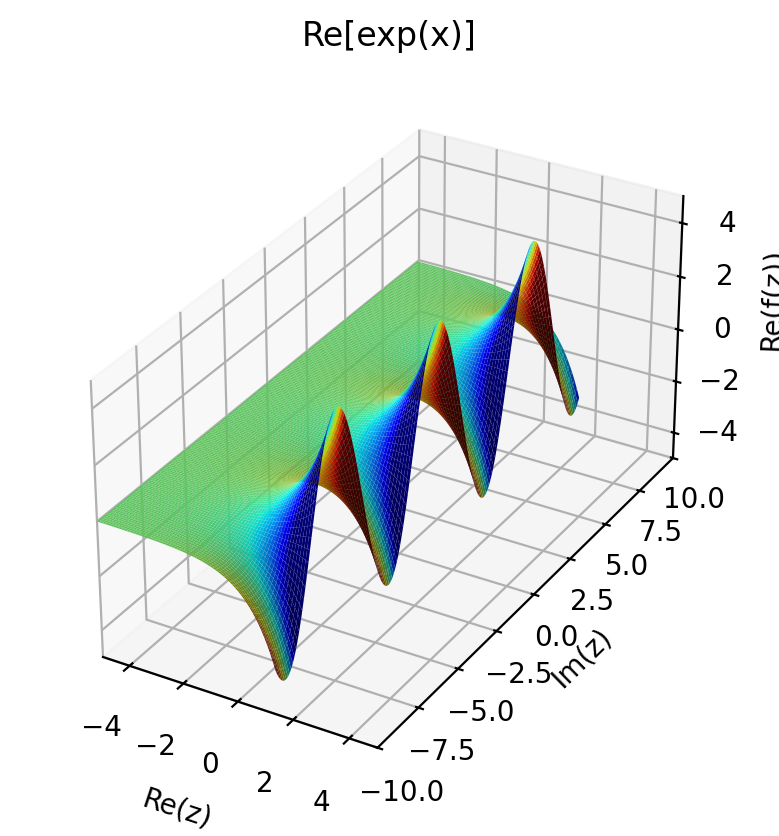

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
delta = 0.1
lims = -5, 5
a = np.arange(-5,1.5, delta)
b = np.arange(-10,10, delta)
A, B = np.meshgrid(a, b)
Z = A + B * 1j  # Complex grid

# Define a function of z
def func(z):
    return np.exp(z)

F = func(Z)

# Components
X = Z.real
Y = Z.imag
Z_surface = F.real
color_values = F.imag

# Clip Z values for clean z-limits (no triangle holes)
Z_surface_clipped = np.clip(Z_surface, lims[0], lims[1])

# Normalize colors
norm = plt.Normalize(-2, 2)
colors = plt.cm.jet(norm(color_values))

# Plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_surface_clipped,
                facecolors=colors,
                edgecolor='none',
                linewidth=0.1,
                cstride=1, rstride=1)

# Labels and limits
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Re(f(z))')
ax.set_zlim(*lims)
ax.set_xlim(*lims)
ax.set_ylim(-10,10)
ax.set_box_aspect([1,2,1])
plt.title("Re[exp(x)]")
plt.show()


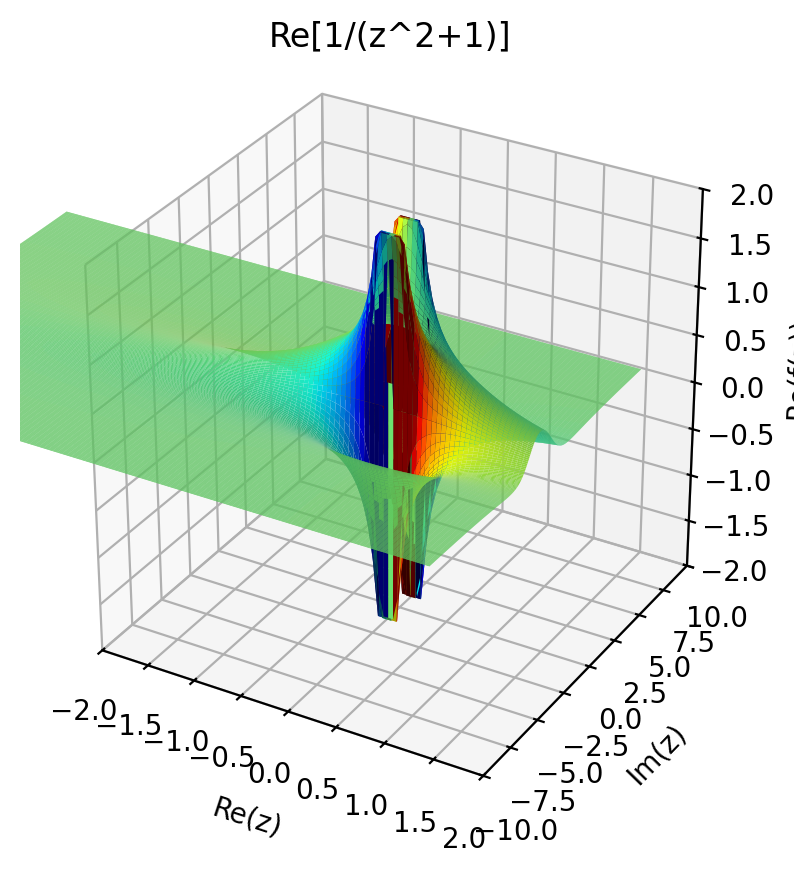

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
delta = 0.05
lims = -2, 2
a = np.arange(-5,1.5, delta)
b = np.arange(-10,10, delta)
A, B = np.meshgrid(a, b)
Z = A + B * 1j  # Complex grid

# Define a function of z
def func(z):
    return 1 / (z**2 + 1)

F = func(Z)

# Components
X = Z.real
Y = Z.imag
Z_surface = F.real
color_values = F.imag

# Clip Z values for clean z-limits (no triangle holes)
Z_surface_clipped = np.clip(Z_surface, lims[0], lims[1])

# Normalize colors
norm = plt.Normalize(-2, 2)
colors = plt.cm.jet(norm(color_values))

# Plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_surface_clipped,
                facecolors=colors,
                edgecolor='none',
                linewidth=0.1,
                cstride=1, rstride=1)

# Labels and limits
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Re(f(z))')
ax.set_zlim(*lims)
ax.set_xlim(*lims)
ax.set_ylim(-10,10)
ax.set_box_aspect([1,1,1])
plt.title("Re[1/(z^2+1)]")
plt.show()


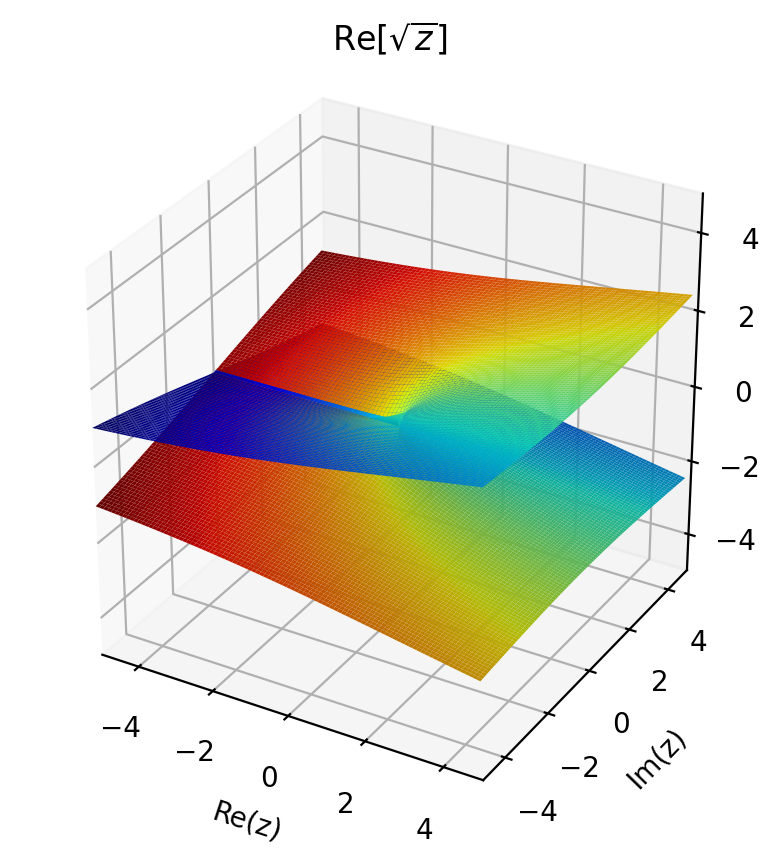

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
delta = 0.1
lims = -5, 5
a = np.arange(*lims, delta)
b = np.arange(*lims, delta)
A, B = np.meshgrid(a, b)
Z = A + B * 1j  # Complex grid

# Define principal branch
F1 = np.sqrt(Z)

# Define second branch: negate the result to get the other root
F2 = -F1

# Components
X = Z.real
Y = Z.imag

# Values for branch 1
Z1 = F1.real
C1 = F1.imag

# Values for branch 2
Z2 = F2.real
C2 = F2.imag

# Normalize both color maps together
all_imags = np.concatenate([C1.ravel(), C2.ravel()])
norm = plt.Normalize(np.min(all_imags), np.max(all_imags))
colors1 = plt.cm.jet(norm(C1))
colors2 = plt.cm.jet(norm(C2))

# Plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Plot both branches
ax.plot_surface(X, Y, Z1,
                facecolors=colors1,
                edgecolor='none',
                linewidth=0.1,
                cstride=1, rstride=1)

ax.plot_surface(X, Y, Z2,
                facecolors=colors2,
                edgecolor='none',
                linewidth=0.1,
                cstride=1, rstride=1)

# Labels and limits
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Re(f(z))')
ax.set_xlim(*lims)
ax.set_ylim(*lims)
ax.set_zlim(*lims)
ax.set_box_aspect([1, 1, 1])
plt.title(r"Re[$\sqrt{z}$]")
plt.show()


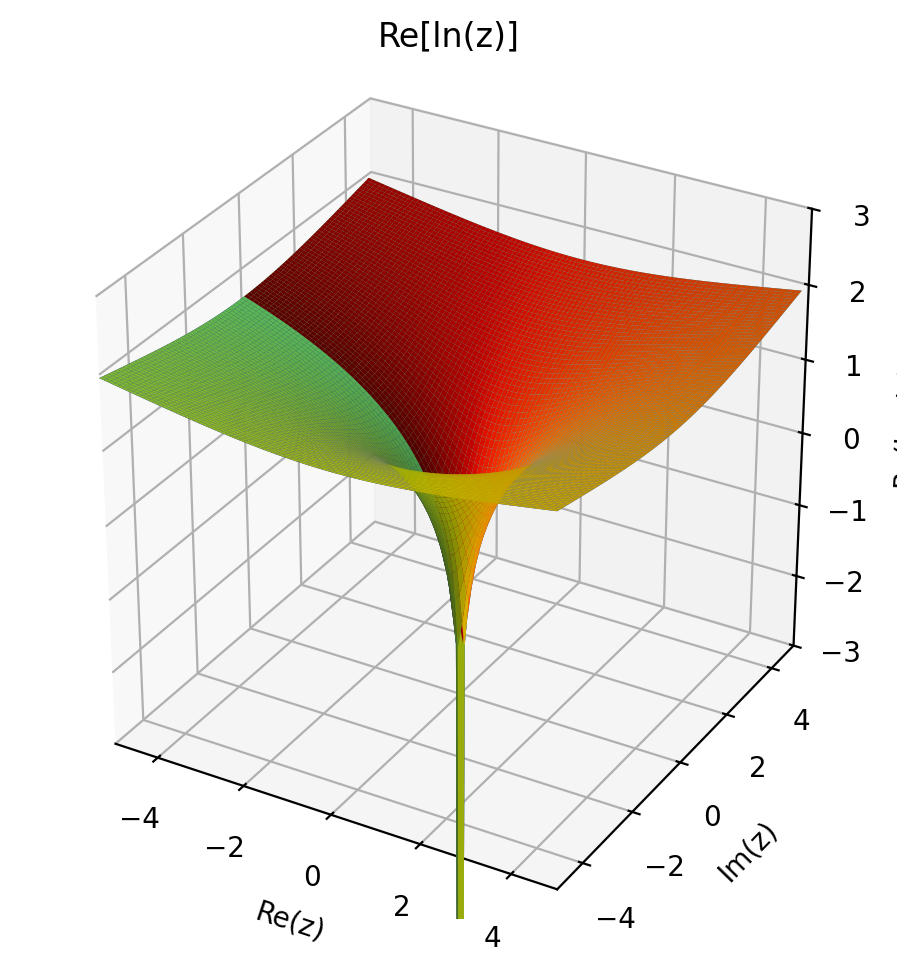

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
delta = 0.1
lims = -5, 5
a = np.arange(*lims, delta)
b = np.arange(*lims, delta)
A, B = np.meshgrid(a, b)
Z = A + B * 1j  # Complex grid

# Principal branch of log
F1 = np.log(Z)

# Second branch (2πi added)
F2 = np.log(Z) + 2j * np.pi

# Components
X = Z.real
Y = Z.imag

Z1 = F1.real
C1 = F1.imag  # color = imag part

Z2 = F2.real
C2 = F2.imag

# Normalize colormap across both branches
all_C = np.concatenate([C1.ravel(), C2.ravel()])
norm = plt.Normalize(np.min(all_C), np.max(all_C))
colors1 = plt.cm.jet(norm(C1))  # hsv to show angle/imag clearly
colors2 = plt.cm.jet(norm(C2))

# Plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z1,
                facecolors=colors1,
                edgecolor='none',
                linewidth=0.1,
                cstride=1, rstride=1)

ax.plot_surface(X, Y, Z2,
                facecolors=colors2,
                edgecolor='none',
                linewidth=0.1,
                cstride=1, rstride=1)

# Labels and limits
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Re(log(z))')
ax.set_xlim(*lims)
ax.set_ylim(*lims)
ax.set_zlim(-3, 3)
ax.set_box_aspect([1, 1, 1])
plt.title("Re[ln(z)]")
plt.tight_layout()
plt.show()


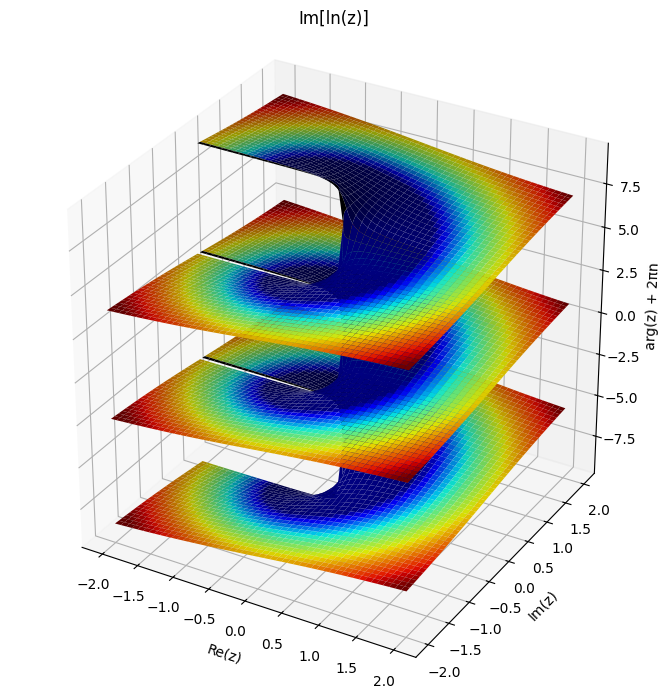

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up grid in the complex plane
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Mask the origin to avoid log(0)
Z[np.isclose(np.abs(Z), 0)] = np.nan

# Compute log(z)
real_lnZ = np.log(np.abs(Z))
imag_lnZ = np.angle(Z)

# Force branch cut: mask near the negative real axis (Im ~ 0, Re < 0)
branch_cut_mask = (np.abs(Y) < 0.02) & (X < 0)
imag_lnZ[branch_cut_mask] = np.nan
real_lnZ[branch_cut_mask] = np.nan

# Spiral branches
N = 1
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for n in range(-N, N + 1):
    imag_layer = imag_lnZ + 2 * np.pi * n
    ax.plot_surface(X, Y, imag_layer,
                    facecolors=plt.cm.jet(real_lnZ),
                    alpha=1, linewidth=0)
                    # cstride=2,rstride=2)

# Labels
ax.set_title("Im[ln(z)]")
ax.set_xlabel("Re(z)")
ax.set_ylabel("Im(z)")
ax.set_zlabel("arg(z) + 2πn")
ax.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()


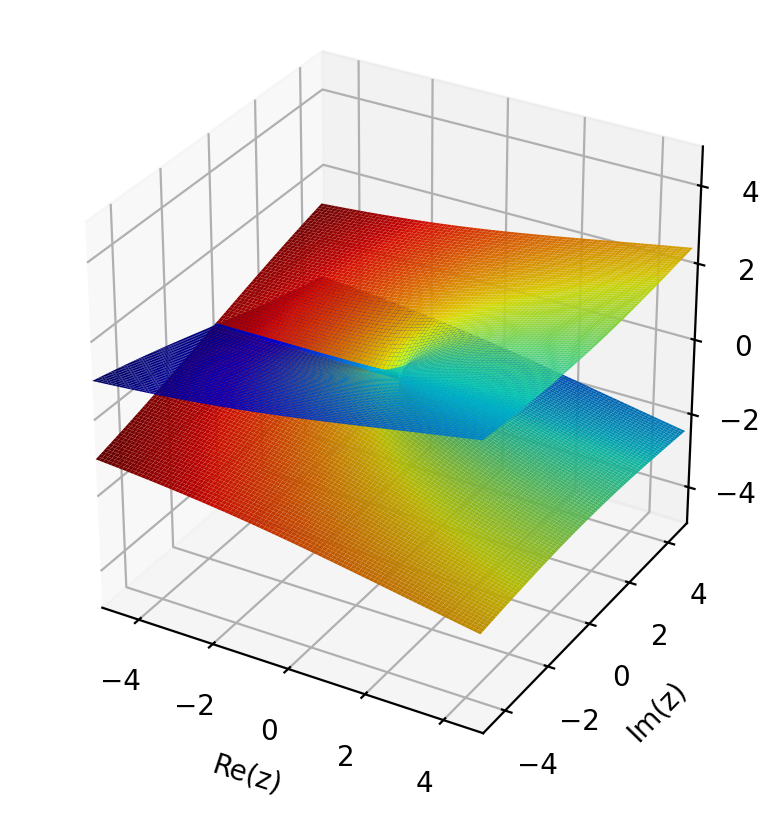

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
delta = 0.1
lims = -5, 5
a = np.arange(*lims, delta)
b = np.arange(*lims, delta)
A, B = np.meshgrid(a, b)
Z = A + B * 1j  # Complex grid

# Define principal branch
F1 = np.sqrt(Z)

# Define second branch: negate the result to get the other root
F2 = -F1

# Components
X = Z.real
Y = Z.imag

# Values for branch 1
Z1 = F1.real
C1 = F1.imag

# Values for branch 2
Z2 = F2.real
C2 = F2.imag

# Normalize both color maps together
all_imags = np.concatenate([C1.ravel(), C2.ravel()])
norm = plt.Normalize(np.min(all_imags), np.max(all_imags))
colors1 = plt.cm.jet(norm(C1))
colors2 = plt.cm.jet(norm(C2))

# Plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Plot both branches
ax.plot_surface(X, Y, Z1,
                facecolors=colors1,
                edgecolor='none',
                linewidth=0.1,
                cstride=1, rstride=1)

ax.plot_surface(X, Y, Z2,
                facecolors=colors2,
                edgecolor='none',
                linewidth=0.1,
                cstride=1, rstride=1)

# Labels and limits
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Re(f(z))')
ax.set_xlim(*lims)
ax.set_ylim(*lims)
ax.set_zlim(*lims)
ax.set_box_aspect([1, 1, 1])

plt.show()


c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\transforms.py:2875: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2892: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


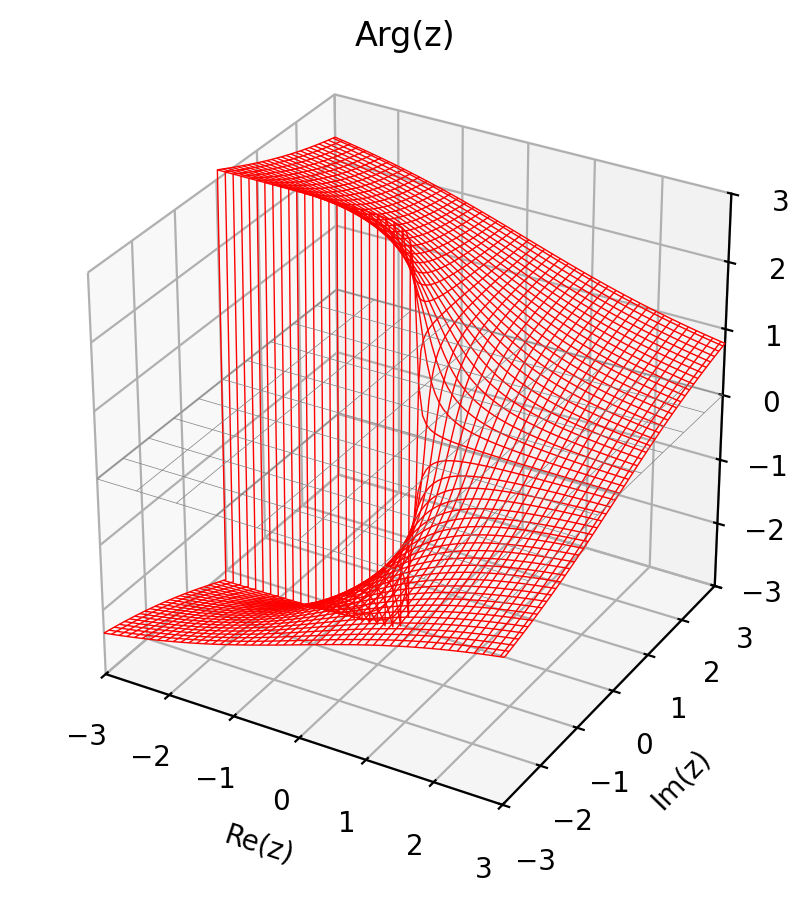

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid
lims = -3,3
N = 100
x = np.linspace(*lims, N)
y = np.linspace(*lims, N)
X, Y = np.meshgrid(x, y)
Z = X + Y*1j  # Replace with your own function
F = Arg(Z)
flat = 0*Z
# Set up 3D plot
fig = plt.figure(figsize = (5,5), dpi = 200)
ax = fig.add_subplot(111, projection='3d')

# Plot wireframe (mesh grid, no color fill)
ax.plot_wireframe(X, Y, F, color='red', linewidth=0.5)
ax.plot_wireframe(X, Y, flat, color='gray', linewidth=0.25, rstride = 10, cstride=10)

def set_aspect_equal():
    # --- Force equal aspect ratio ---
    # Get the ranges
    x_range = np.ptp(x)   # peak to peak = max - min
    y_range = np.ptp(y)
    z_range = np.ptp(Z)

    # Get the maximum range of all axes
    max_range = max(x_range, y_range, z_range)

    # Compute midpoints
    x_middle = 0.5 * (x.min() + x.max())
    y_middle = 0.5 * (y.min() + y.max())
    z_middle = 0.5 * (Z.min() + Z.max())

    # Set limits so the range is the same in all directions
    ax.set_xlim(x_middle - max_range/2, x_middle + max_range/2)
    ax.set_ylim(y_middle - max_range/2, y_middle + max_range/2)
    ax.set_zlim(z_middle - max_range/2, z_middle + max_range/2)

ax.set_box_aspect([1, 1, 1])  # ← This makes it truly 1:1:1

set_aspect_equal()
#ax.view_init(elev=30, azim=-45)  # Elevation angle, Azimuth angle
# Optional: set axis labels
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Arg(z)')
plt.title("Arg(z)")
plt.show()

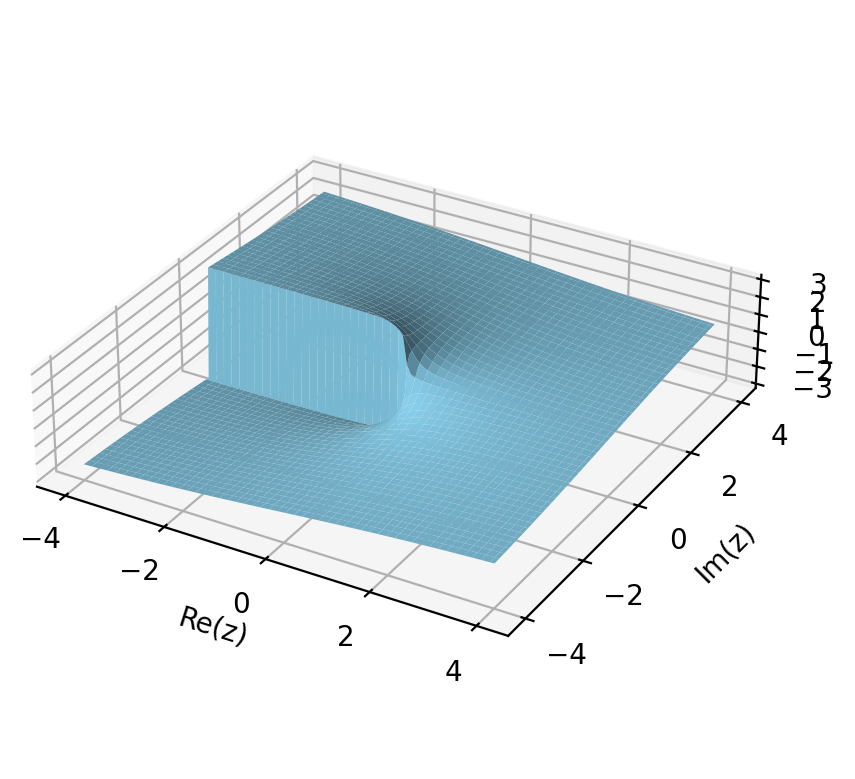

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid
lims = -4,4
N = 100
x = np.linspace(*lims, N)
y = np.linspace(*lims, N)
X, Y = np.meshgrid(x, y)
Z = X + Y*1j  # Replace with your own function
F = Arg(Z)
flat = 0*Z
# Set up 3D plot
fig = plt.figure(dpi = 200)
ax = fig.add_subplot(111, projection='3d')

# Plot wireframe (mesh grid, no color fill)
ax.plot_surface(X, Y, F, color = "skyblue", edgecolor = "black", linewidth = 0, shade=True, alpha=1) # cmap = "inferno"
ax.set_box_aspect([1, 1, 0.25]) ## box aspect ratio
# Optional: set axis labels
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Arg(z)')

plt.show()

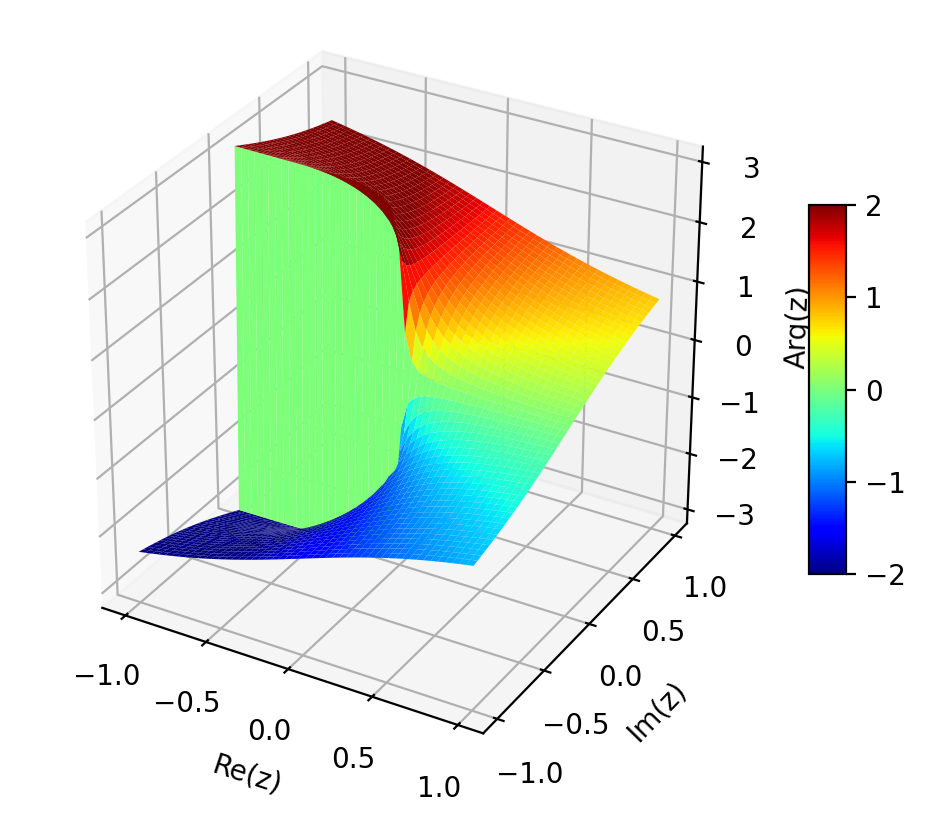

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Grid
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
Z = X + Y*1j  # surface height
F = Arg(Z)
# Plot
fig = plt.figure( dpi = 200)
ax = fig.add_subplot(111, projection='3d')

# Surface with color mapped from Z
surf = ax.plot_surface(X, Y, F, cmap='jet', edgecolor='none', shade=False, cstride = 1, rstride = 1, vmin= -2, vmax=2)  # Try 'plasma', 'inferno', etc.

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_box_aspect([1,1,1])
# Optional: set axis labels
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Arg(z)')
plt.show()


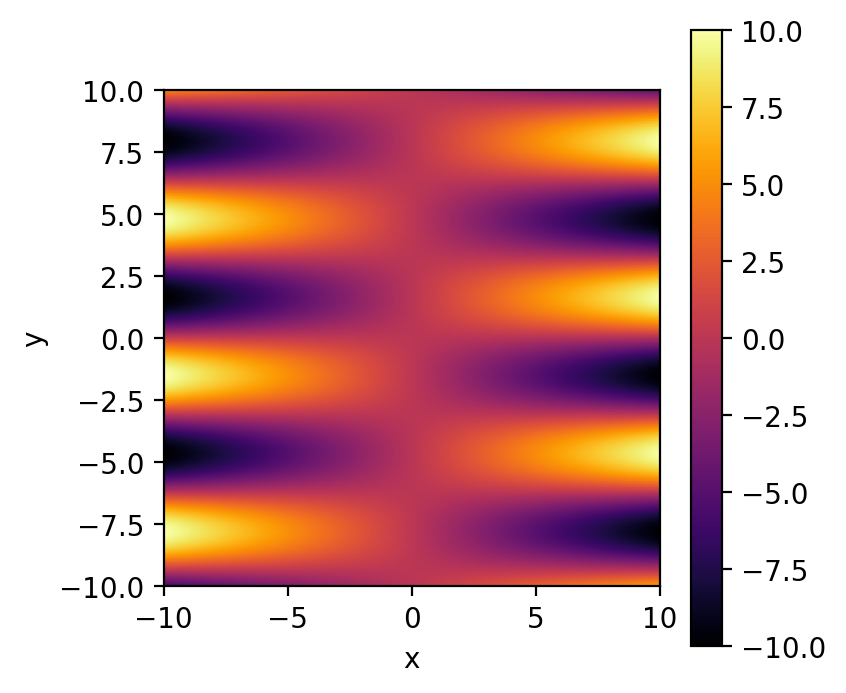

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Domain
lims = -10, 10
dx = 0.1
dy = 0.1
x = np.arange(*lims, dx)
y = np.arange(*lims, dy)
X, Y = np.meshgrid(x, y)

# Function definition
def scalar_function(x, y):
    return x* np.sin(y)

Z = scalar_function(X, Y)
plt.figure(dpi=200, figsize = (4,4))
# Plot using matshow
plt.imshow(Z, cmap='inferno', extent=[*lims, *lims], origin='lower', aspect='equal',vmin=-10,vmax=10)
plt.colorbar()
# plt.title(r"$f(x, y) = e^x \sin y$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


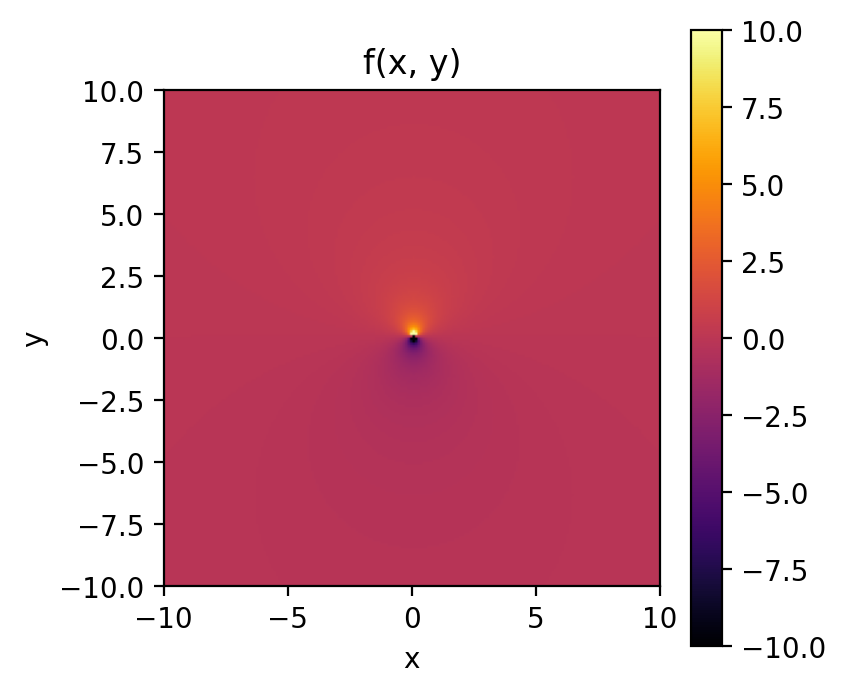

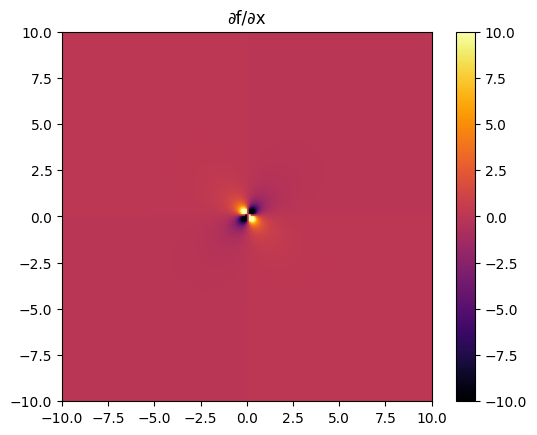

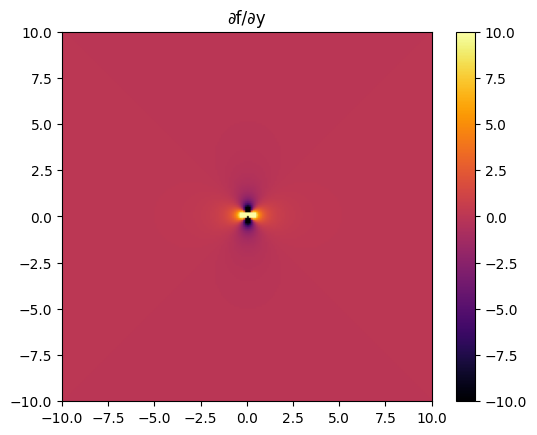

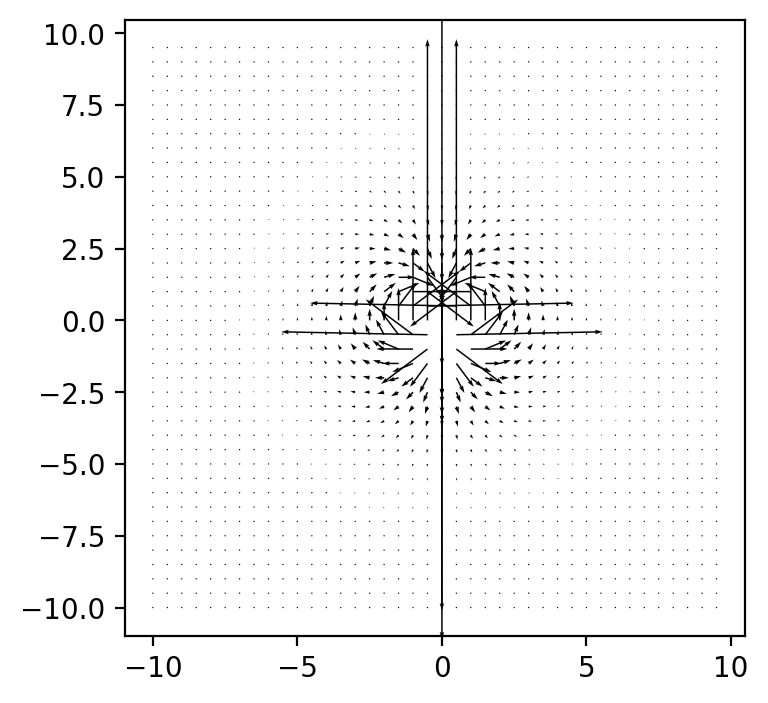

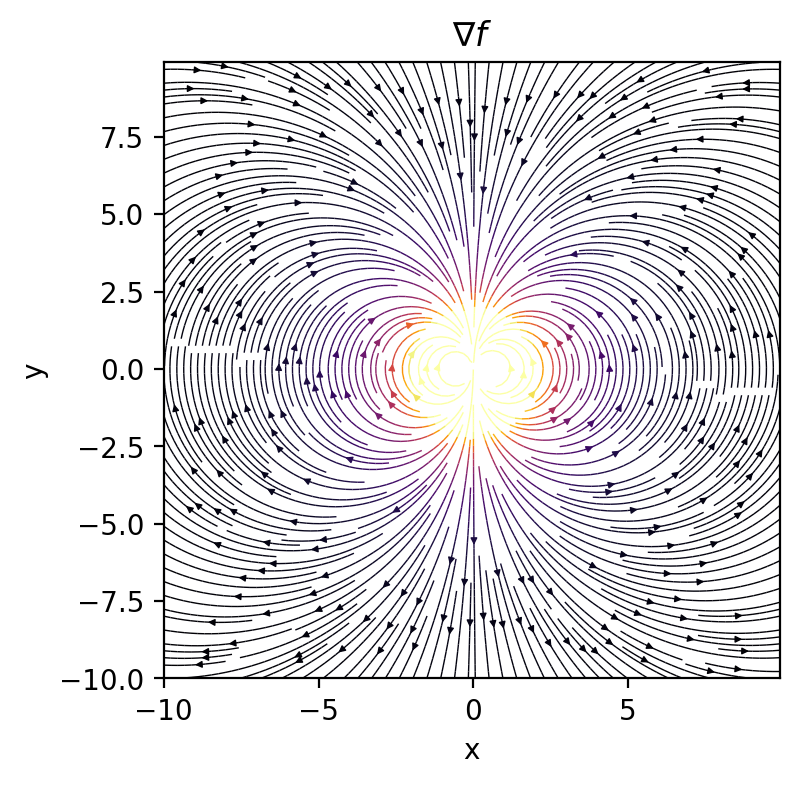

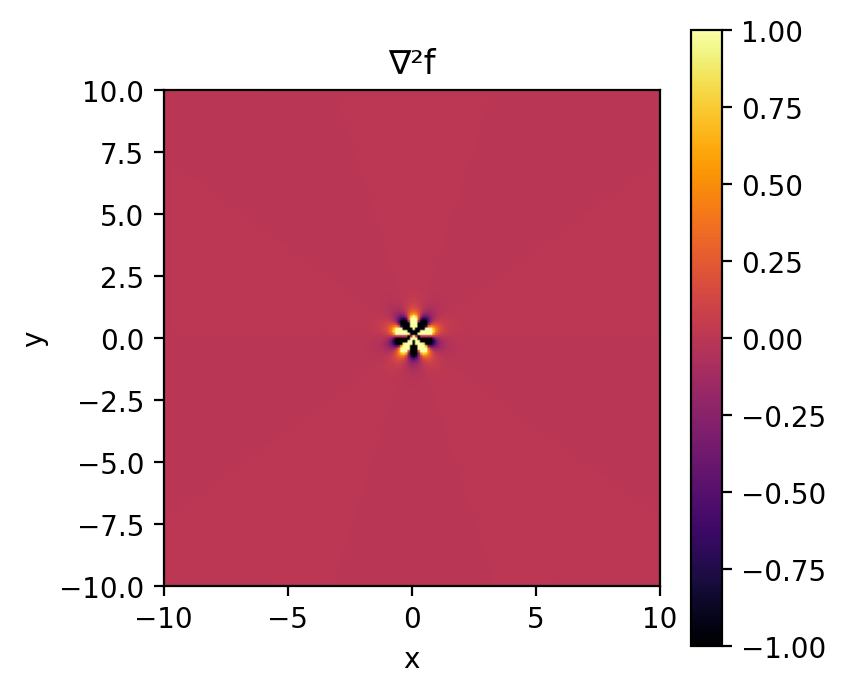

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Domain
lims = -10, 10
dx = 0.1
dy = 0.1
x = np.arange(*lims, dx)
y = np.arange(*lims, dy)
X, Y = np.meshgrid(x, y)  


vims = -10,10
# Function definition
def scalar_function(x, y):
    return   2* y / (x*x+y*y)

# discovered functions, do not touch
def quadrupole(x, y):
    return   (x*y-y*y)/((x*x+y*y)**2)
def weird_ahh_potential(x, y):
    return  x / np.sqrt(x*x+y*y)
def a2D_dipole(x, y):
    return  y / (x*x+y*y)
def monopole(x, y):
    return 1 / np.sqrt(x*x+y*y)
def ring_potential(x, y):
    return  np.exp(-(np.sqrt(x*x+y*y)-3)**2)

Z = scalar_function(X, Y)

# Show the scalar field
plt.figure(dpi=200, figsize=(4, 4))
plt.imshow(Z, cmap='inferno', extent=[*lims, *lims], origin='lower', aspect='equal', vmin=vims[0], vmax=vims[1])
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x, y)")
plt.show()

# Gradient components
dZdx = np.gradient(Z, axis=1) / dx  # ∂Z/∂x
dZdy = np.gradient(Z, axis=0) / dy  # ∂Z/∂y

# Visualize gradient components
plt.imshow(dZdx, cmap="inferno", extent=[*lims, *lims], origin='lower', aspect='equal', vmin=vims[0], vmax=vims[1])
plt.title("∂f/∂x")
plt.colorbar()
plt.show()

plt.imshow(dZdy, cmap="inferno", extent=[*lims, *lims], origin='lower', aspect='equal', vmin=vims[0], vmax=vims[1])
plt.title("∂f/∂y")
plt.colorbar()
plt.show()

# Vector field
step = 5  # Show every 5th vector
plt.figure(dpi=200, figsize=(4, 4))
plt.quiver(
    X[::step, ::step],
    Y[::step, ::step],
    dZdx[::step, ::step],
    dZdy[::step, ::step]
)
# plt.title()
plt.show()

# Streamplot
plt.figure(dpi=200, figsize=(4, 4))
plt.streamplot(x, y, dZdx, dZdy, color=np.clip(np.hypot(dZdx, dZdy),0,0.5), cmap='inferno', density=3,linewidth = 0.5, arrowsize=0.5)
plt.title(r"$\nabla f$")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
# plt.colorbar(label="Gradient Magnitude")
plt.show()

## Divergence of the field
# Second derivatives (for divergence/Laplacian)
d2Zdx2 = np.gradient(dZdx, axis=1) / dx  # ∂²f/∂x²
d2Zdy2 = np.gradient(dZdy, axis=0) / dy  # ∂²f/∂y²

# Divergence (Laplacian) = d2Zdx2 + d2Zdy2
divergence = d2Zdx2 + d2Zdy2

# Plot divergence
plt.figure(dpi=200, figsize=(4, 4))
plt.imshow(divergence, cmap='inferno', extent=[*lims, *lims], origin='lower', aspect='equal', vmin=vims[0]/10, vmax=vims[1]/10)
plt.colorbar()
plt.title("∇²f")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



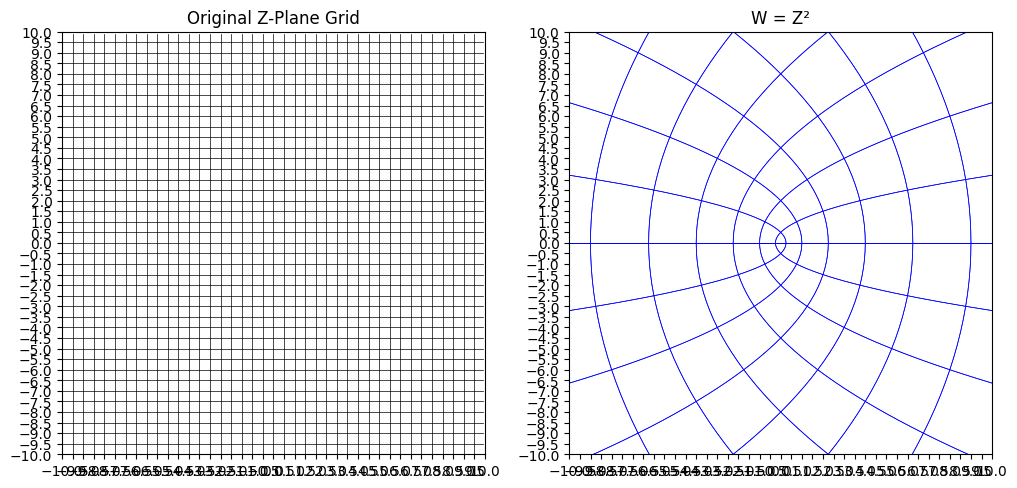

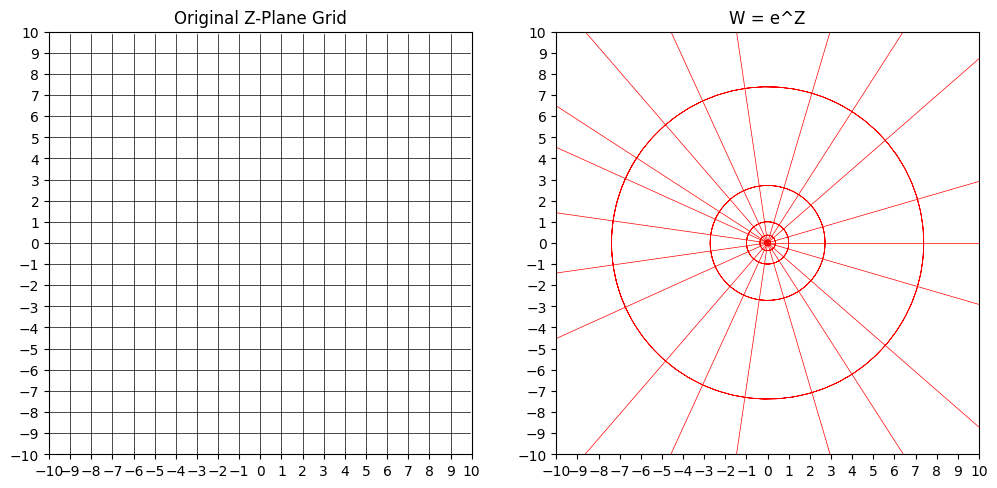

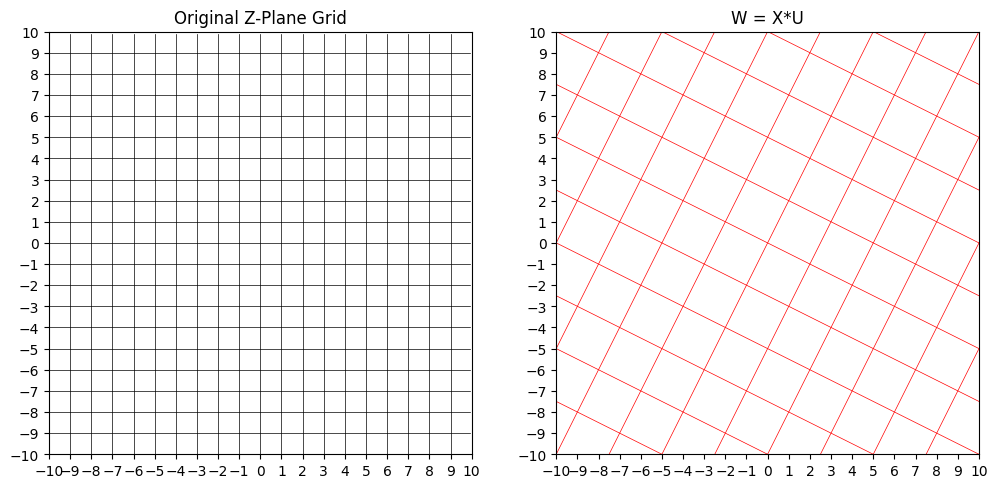

AttributeError: 'float' object has no attribute 'shape'

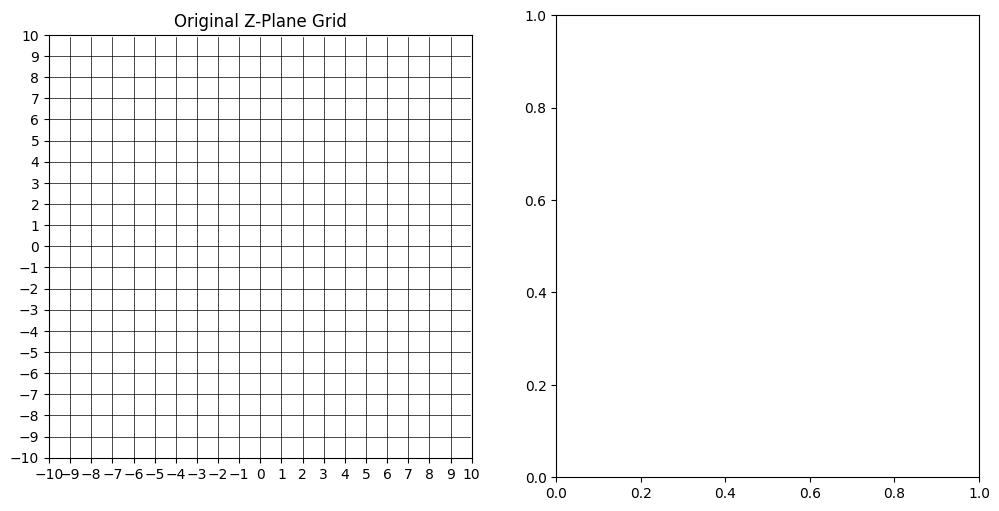

In [15]:
import numpy as np
import matplotlib.pyplot as plt
## grid transformation
# Define the Z-plane grid
lims = (-10, 10)
dx = dy = 0.1
x = np.arange(*lims, dx)
y = np.arange(*lims, dy)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Transformation functions
W_quad = Z ** 2
W_exp = np.exp(Z)
W_new = Z * (1 + 2*1j)
W_inv = 1/(z**2+1)




# Plotting function
def plot_gridlines(ax, X, Y, title, color='k', spacing = 1):
    # Horizontal lines (constant y)
    gap = int(spacing/dx)
    for j in range(0, X.shape[0], gap):
        ax.plot(X[j, :], Y[j, :], color=color, lw=0.5)
    # Vertical lines (constant x)
    for i in range(0, X.shape[1], gap):
        ax.plot(X[:, i], Y[:, i], color=color, lw=0.5)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.set_xlim(*lims)
    ax.set_ylim(*lims)
    ax.set_xticks(np.arange(lims[0],lims[1]+spacing,spacing))
    ax.set_yticks(np.arange(lims[0],lims[1]+spacing,spacing))


# Plot quadratic transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_gridlines(ax1, X, Y, "Original Z-Plane Grid", spacing = 0.5)
plot_gridlines(ax2, np.real(W_quad), np.imag(W_quad), "W = Z²", color='b', spacing = 0.5)
plt.show()

# Plot exponential transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_gridlines(ax1, X, Y, "Original Z-Plane Grid")
plot_gridlines(ax2, np.real(W_exp), np.imag(W_exp), "W = e^Z", color='r')
plt.show()

# Plot exponential transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_gridlines(ax1, X, Y, "Original Z-Plane Grid")
plot_gridlines(ax2, np.real(W_new), np.imag(W_new), "W = X*U", color='r')
plt.show()

# Plot exponential transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_gridlines(ax1, X, Y, "Original Z-Plane Grid")
plot_gridlines(ax2, np.real(W_inv), np.imag(W_inv), "W = X*U", color='r')
plt.show()

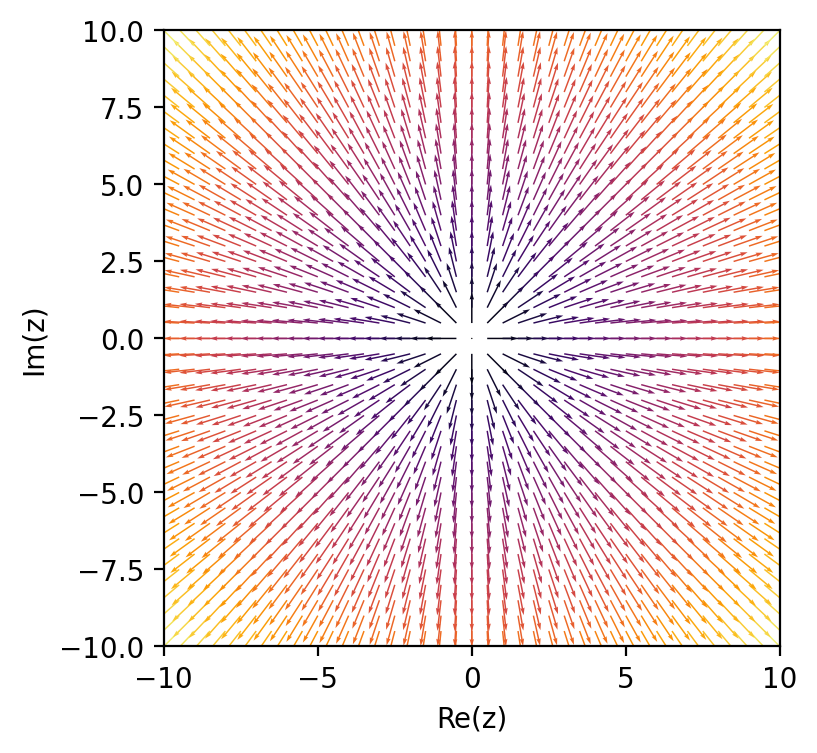

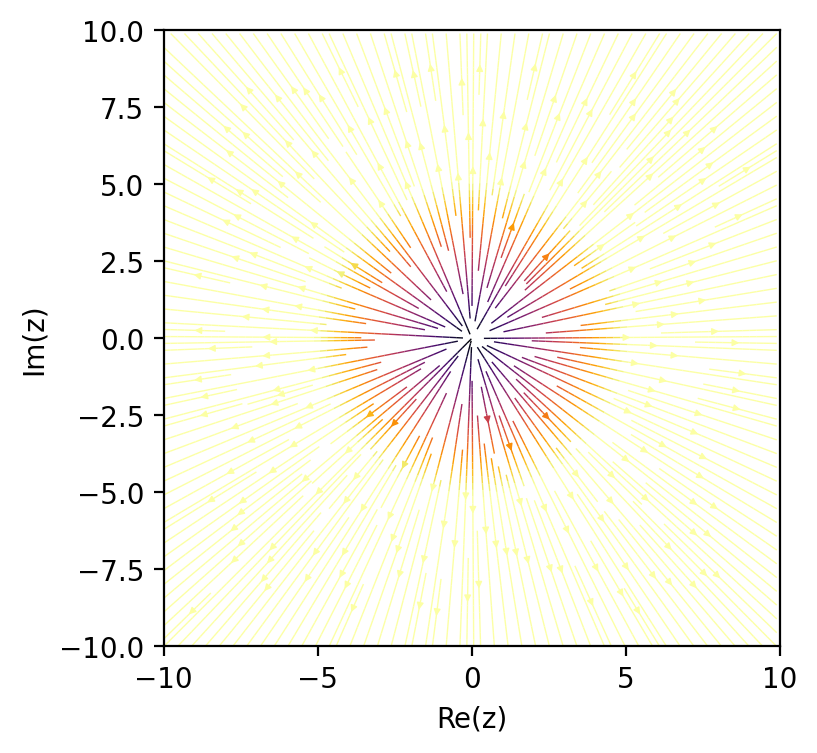

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Grid in the z-plane
dx = dy = 0.1
lims = (-10, 10)
x = np.arange(*lims, dx)
y = np.arange(*lims, dy)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Function to transform
def func(z):
    return z

W = func(Z)
mag = np.abs(W)
# Vector field: from original point (Z) to transformed point (W)
U = np.real(W)#- np.real(Z)  # x-component of vector
V = np.imag(W)#- np.imag(Z)  # y-component of vector

step = 5  # plot every nth vector
plt.figure(dpi=200, figsize=(4, 4))
q = plt.quiver(
    X[::step, ::step],
    Y[::step, ::step],
    U[::step, ::step]/ (mag[::step, ::step] + 1e-12),
    V[::step, ::step]/ (mag[::step, ::step] + 1e-12),
    mag[::step, ::step],  # color
    cmap='inferno',
    angles='xy',
    scale_units='xy',
    scale=1
)
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.gca().set_aspect('equal')
plt.ylim(*lims)
plt.xlim(*lims)
plt.show()

# Optional: streamplot version
plt.figure(dpi=200, figsize=(4, 4))
plt.streamplot(
    np.real(Z), np.imag(Z), U, V,
    color=np.clip(np.hypot(U, V), 0, 5),
    cmap='inferno',
    density=3, linewidth=0.5, arrowsize=0.5
)
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.gca().set_aspect('equal')
plt.ylim(*lims)
plt.xlim(*lims)
plt.show()


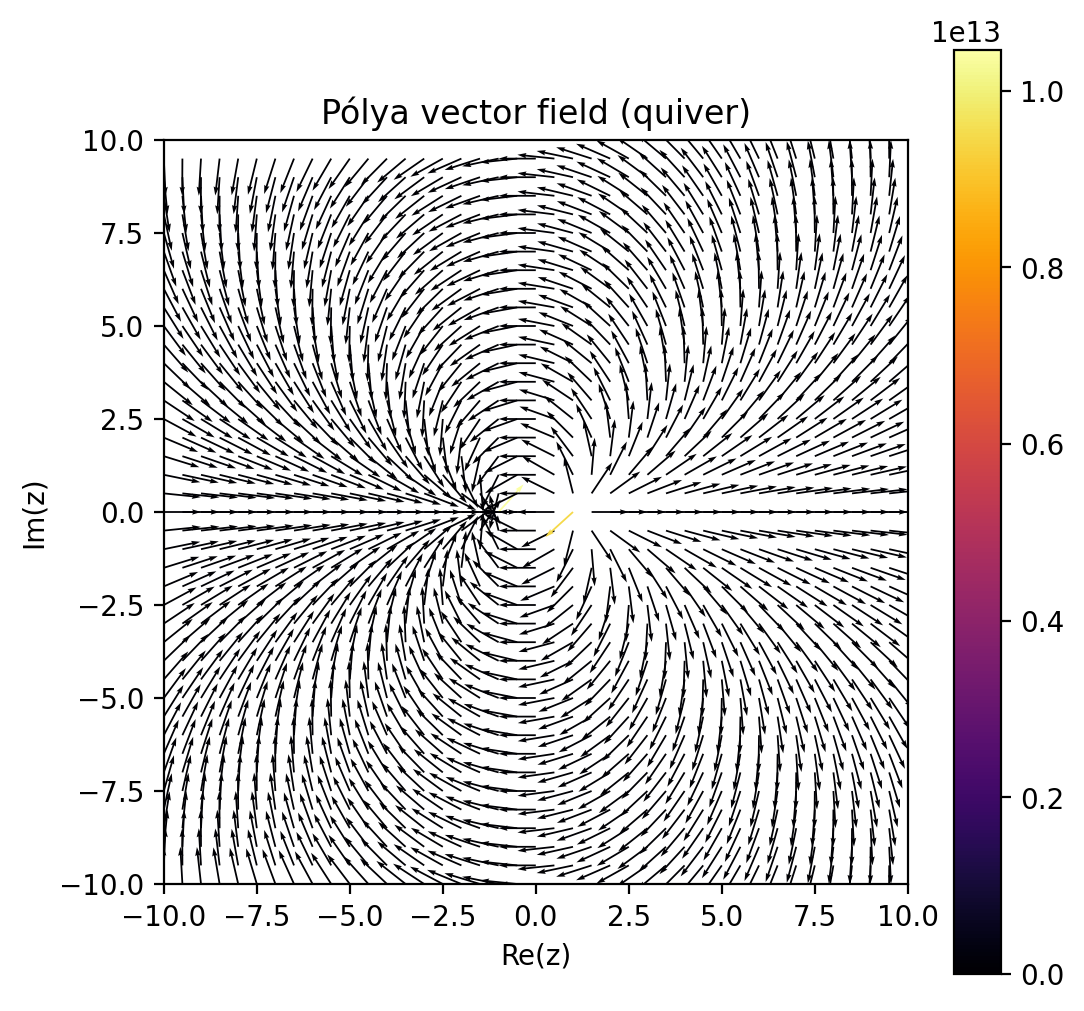

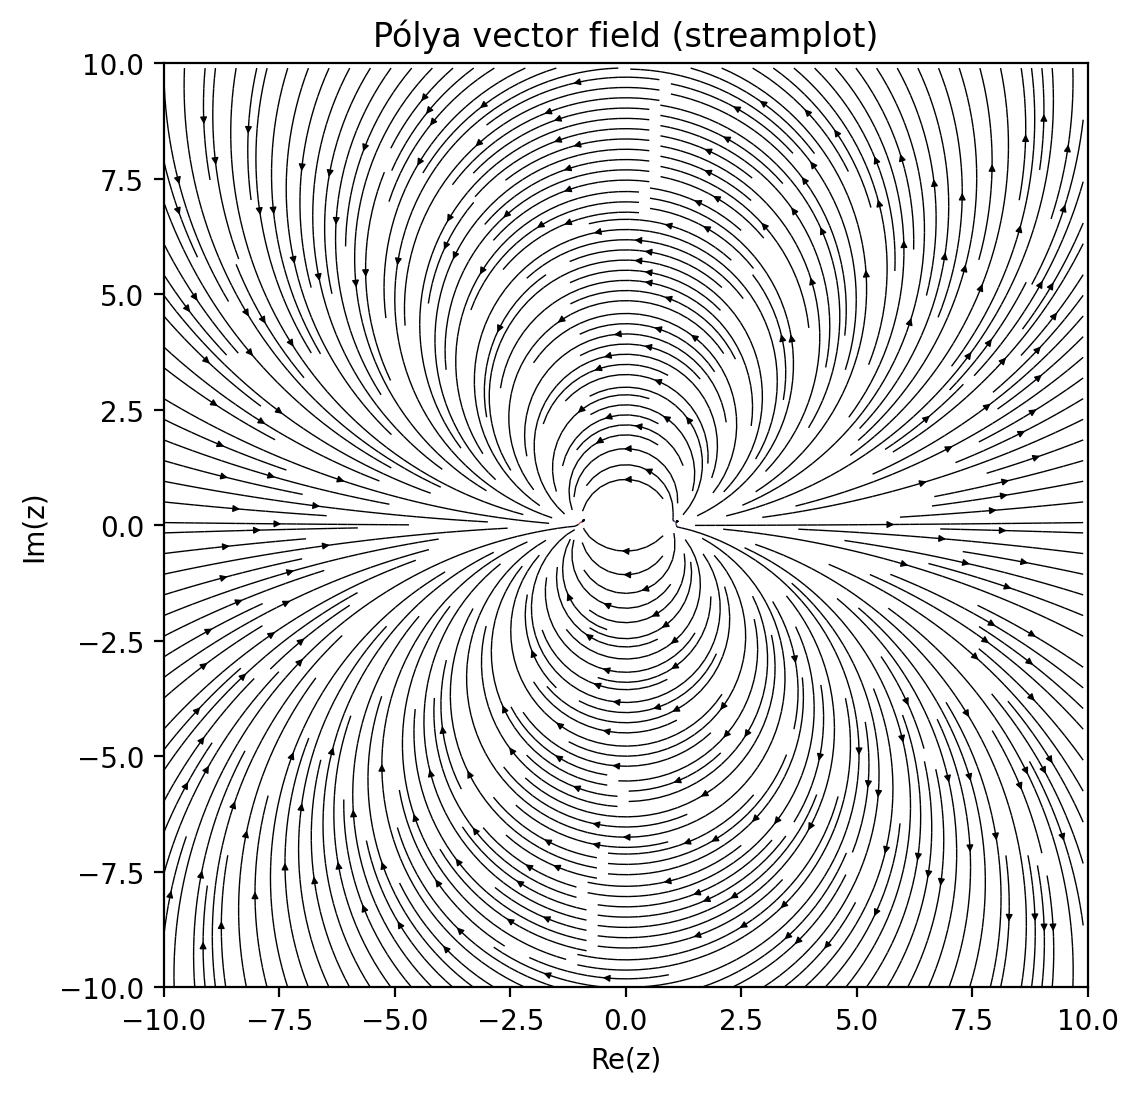

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Grid in the z-plane
dx = dy = 0.1
lims = (-10, 10)
x = np.arange(*lims, dx)
y = np.arange(*lims, dy)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Mapping function
def func(z):
    return 1/(z**2-1)

W = func(Z)

# --- Pólya vector field ---
Poly = np.conj(W)               # conjugate of transformation
mag = np.abs(Poly)              # magnitude for colormap

# Normalize for quiver arrows
U = np.real(Poly) / (mag + 1e-12)
V = np.imag(Poly) / (mag + 1e-12)

# --- Quiver Plot (normalized arrows, colored by magnitude) ---
step = 5
plt.figure(dpi=200, figsize=(6, 6))
q = plt.quiver(
    X[::step, ::step],
    Y[::step, ::step],
    U[::step, ::step],
    V[::step, ::step],
    mag[::step, ::step],  # color
    cmap='inferno',
    angles='xy',
    scale_units='xy',
    scale=1
)
plt.colorbar(q) #, label=r"$|\overline{f(z)}|$")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title(r"Pólya vector field (quiver)")
plt.gca().set_aspect('equal')
plt.ylim(*lims)
plt.xlim(*lims)
plt.show()

# --- Streamplot (true field lines) ---
plt.figure(dpi=200, figsize=(6, 6))
strm = plt.streamplot(
    x, y,
    np.real(Poly), np.imag(Poly),
    color=np.clip(mag, 0, 100),  # keep extreme magnitudes from blowing out the colormap
    cmap='inferno',
    density=3,
    linewidth=0.5,
    arrowsize=0.5
)
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title(r"Pólya vector field (streamplot)")
plt.gca().set_aspect('equal')
plt.ylim(*lims)
plt.xlim(*lims)
plt.show()


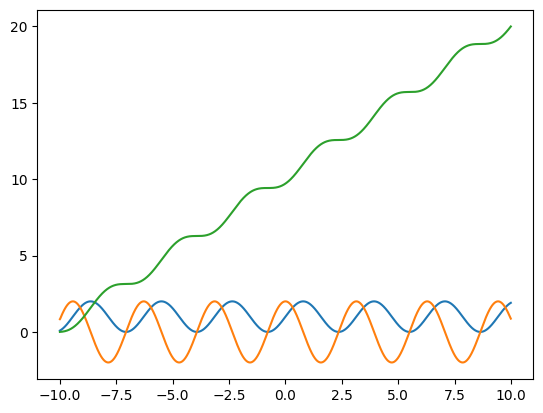

In [ ]:
dx = 0.01
x = np.arange(-10,10,dx)
fx = np.sin(2*x)+1 

dfdx = np.gradient(fx)/dx
intfdx = np.cumsum(fx)*dx

plt.plot(x,fx)
plt.plot(x,dfdx)
plt.plot(x,intfdx)

[ 6.09321621e-17+0.00000000e+00j -1.86482774e-17-7.79947938e-18j
  2.62376926e-17+1.63443478e-17j  5.70290343e-17-3.82181266e-17j
  8.19656842e-17+6.86164450e-17j -1.82145965e-17-5.00000000e-01j
 -1.08420217e-16-1.15196481e-17j -3.49113100e-17-8.40256684e-18j
  2.16840434e-17+9.32955969e-17j  7.65446734e-17-4.85722573e-17j
  1.11672824e-16+5.75711354e-17j  2.36356074e-17+2.29308759e-17j
  3.77302356e-17+8.20198943e-17j -5.05238212e-17+2.39879731e-16j
  1.09504419e-16+1.91578524e-16j -2.34187669e-17-2.50000000e-01j
  2.19008839e-17-2.71809485e-16j -1.62630326e-17-7.28312809e-16j
  1.82145965e-17-6.92805188e-17j  4.66206934e-17-1.72388145e-16j
  1.46584134e-16-4.10912623e-17j  2.88397778e-17+1.22840106e-16j
 -2.49366500e-17+4.03323208e-17j  3.40439482e-17-7.03647210e-17j
  6.80878964e-17-9.76866157e-17j  5.35595873e-17-1.83447008e-16j
 -3.25260652e-19+1.68810278e-16j  2.46981255e-16-4.32596667e-16j
  2.44596010e-16-4.92444627e-16j -1.56125113e-17-6.97684098e-16j
 -4.22405166e-16-8.033938

ValueError: x and y must have same first dimension, but have shapes (1,) and (256,)

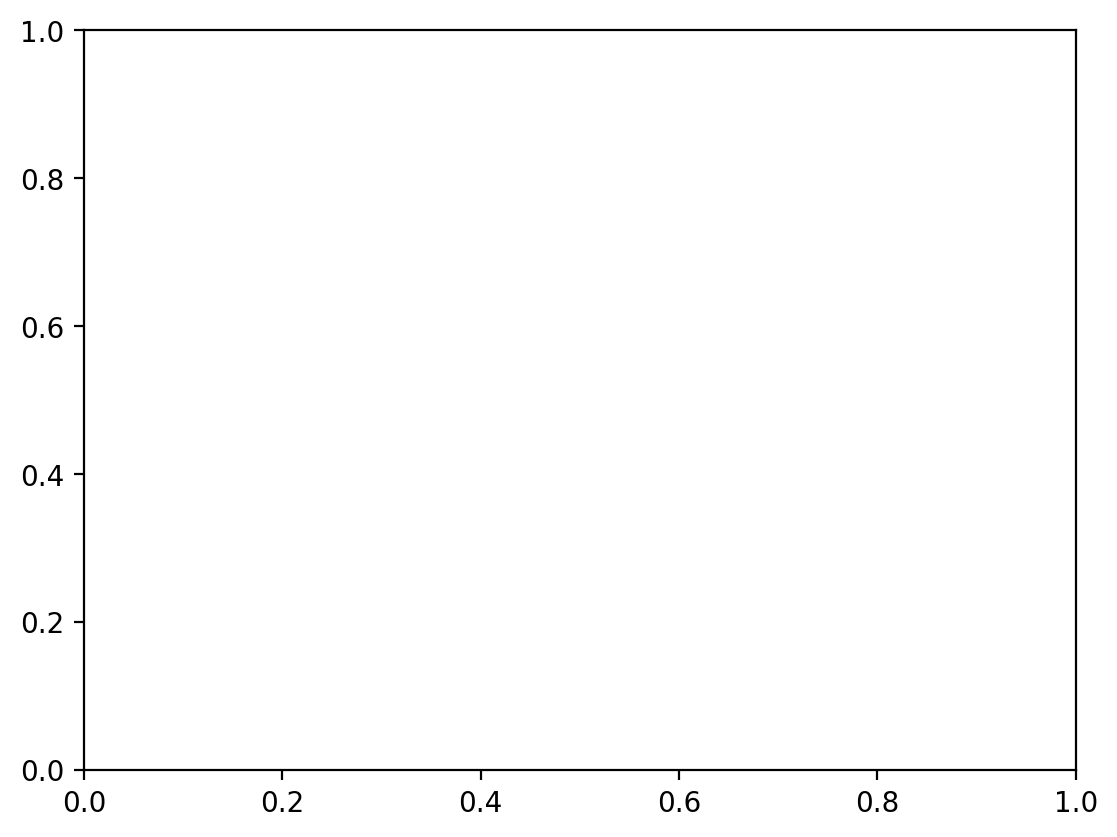

In [ ]:
import numpy as np

# Define the signal
N = 256              # number of samples
T = 1.0               # total time
dt = T / N            # sampling interval
t = np.linspace(0, T, N, endpoint=False)

# Example signal: sum of two sines
f = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*15*t)

# Frequencies for output
freqs = np.fft.fftfreq(N, dt)  # just for plotting

# Manual DFT
F = np.zeros(N, dtype=complex)
for k in range(N):
    for n in range(N):
        F[k] += f[n] * np.exp(-2j * np.pi * k * n / N)
# Scaling to match continuous FT convention (optional)
F *= dt

print(F)
print(len(F))
# --- Plot the result ---
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.plot(freqs, np.abs(F))
plt.title("Manual Fourier Transform")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()
